In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

In [62]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0


In [3]:
df1=df.reset_index()['Close']

In [21]:
d=pd.DataFrame(df1)

In [23]:
d.isnull().any()

0    True
dtype: bool

In [24]:
d.isnull().sum()

0    6
dtype: int64

In [28]:
d=d.dropna()

In [29]:
d.isnull().sum()

0    0
dtype: int64

In [31]:
df1=d[0]

In [34]:
df1.isnull().any()

False

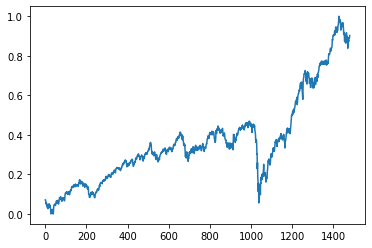

In [35]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [37]:
df1

array([[0.07132518],
       [0.07074726],
       [0.06695374],
       ...,
       [0.89019627],
       [0.88935758],
       [0.90240257]])

In [38]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [39]:
len(train_data)

1180

In [40]:
len(test_data)

295

In [41]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [43]:
X_train[1]

array([0.07074726, 0.06695374, 0.05194475, 0.05481708, 0.05155804,
       0.0469041 , 0.051432  , 0.04920716, 0.04060329, 0.03305971,
       0.04036866, 0.02943564, 0.02661113, 0.03926929, 0.0404599 ,
       0.04059896, 0.03946046, 0.05153194, 0.05087147, 0.0421459 ,
       0.0339983 , 0.03766582, 0.04506168, 0.03621011, 0.02847099,
       0.0213011 , 0.00049972, 0.0008995 , 0.01671672, 0.00674838,
       0.01198024, 0.01921965, 0.02087089, 0.02293928, 0.01207581,
       0.00418027, 0.        , 0.00514059, 0.00142961, 0.02187466,
       0.03461102, 0.04388843, 0.04473578, 0.04473141, 0.04877262,
       0.04480529, 0.04689544, 0.04937664, 0.04258481, 0.04590033,
       0.04709964, 0.0550778 , 0.06375988, 0.06468544, 0.0648245 ,
       0.05601206, 0.05443902, 0.06644969, 0.06672777, 0.06452465,
       0.06850068, 0.05497787, 0.05594688, 0.05004585, 0.05080629,
       0.06090495, 0.06416836, 0.07646581, 0.08204964, 0.08205397,
       0.0818193 , 0.08071122, 0.07686555, 0.08621684, 0.08771

In [44]:
y_train[0]

0.10510192328784174

In [45]:
print(X_train.shape), print(y_train.shape)

(1079, 100)
(1079,)


(None, None)

In [46]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [47]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [49]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='RMSprop')

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 3s 67ms/step - loss: 0.0116 - val_loss: 0.0878
Epoch 2/100
17/17 [==============================] - 0s 27ms/step - loss: 0.0034 - val_loss: 0.0085
Epoch 3/100
17/17 [==============================] - 0s 26ms/step - loss: 0.0022 - val_loss: 0.0219
Epoch 4/100
17/17 [==============================] - 0s 27ms/step - loss: 0.0029 - val_loss: 0.0782
Epoch 5/100
17/17 [==============================] - 0s 27ms/step - loss: 0.0025 - val_loss: 0.0064
Epoch 6/100
17/17 [==============================] - 0s 26ms/step - loss: 0.0025 - val_loss: 0.0265
Epoch 7/100
17/17 [==============================] - 0s 27ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 8/100
17/17 [==============================] - 0s 28ms/step - loss: 0.0018 - val_loss: 0.0479
Epoch 9/100
17/17 [==============================] - 0s 28ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 10/100
17/17 [==============================] - 0s 27ms/step - loss: 0.0016 - val_loss: 0.0259

17/17 [==============================] - 1s 30ms/step - loss: 2.9701e-04 - val_loss: 9.3374e-04
Epoch 80/100
17/17 [==============================] - 1s 32ms/step - loss: 2.8203e-04 - val_loss: 0.0016
Epoch 81/100
17/17 [==============================] - 1s 30ms/step - loss: 2.4889e-04 - val_loss: 0.0147
Epoch 82/100
17/17 [==============================] - 1s 30ms/step - loss: 3.6816e-04 - val_loss: 0.0047
Epoch 83/100
17/17 [==============================] - 1s 31ms/step - loss: 2.8714e-04 - val_loss: 0.0044
Epoch 84/100
17/17 [==============================] - 1s 31ms/step - loss: 2.4847e-04 - val_loss: 2.3610e-04
Epoch 85/100
17/17 [==============================] - 1s 31ms/step - loss: 2.8527e-04 - val_loss: 0.0196
Epoch 86/100
17/17 [==============================] - 1s 30ms/step - loss: 3.3189e-04 - val_loss: 0.0030
Epoch 87/100
17/17 [==============================] - 1s 30ms/step - loss: 2.4703e-04 - val_loss: 0.0073
Epoch 88/100
17/17 [==============================] - 1s 31m

In [52]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [59]:
##Transformback to original form
train_predict1=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
train_predict1

array([[0.08935509],
       [0.08996062],
       [0.09249682],
       ...,
       [0.40717232],
       [0.41409242],
       [0.42582792]], dtype=float32)

In [54]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.012472175146604533

In [55]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.04466674181772061

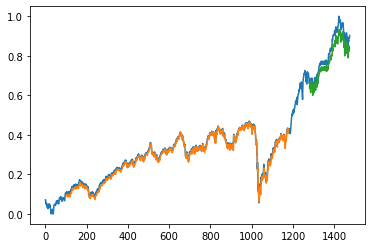

In [56]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()